# main

In [21]:
!pip install xgboost

import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
train_data = pd.read_csv("/data/notebook_files/train.csv")
test_data = pd.read_csv("/data/notebook_files/test.csv")
sample_submission_data = pd.read_csv("/data/notebook_files/sample_submission.csv")

# shape of the data

In [3]:
print(f"train data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"submisison sample shape: {sample_submission_data.shape}")

train data shape: (593994, 13)
test_data shape: (254569, 12)
submisison sample shape: (254569, 2)


# view of the data

In [4]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
test_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [6]:
train_data.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


# checking null values

In [8]:
train_data.isna().sum().reset_index()

,index,0
0,id,0
1,annual_income,0
2,debt_to_income_ratio,0
3,credit_score,0
4,loan_amount,0
5,interest_rate,0
6,gender,0
7,marital_status,0
8,education_level,0
9,employment_status,0


In [9]:
test_data.isna().sum().reset_index()

,index,0
0,id,0
1,annual_income,0
2,debt_to_income_ratio,0
3,credit_score,0
4,loan_amount,0
5,interest_rate,0
6,gender,0
7,marital_status,0
8,education_level,0
9,employment_status,0


# description of the data

In [10]:
train_data.describe() 

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


heatmap

<Axes: >

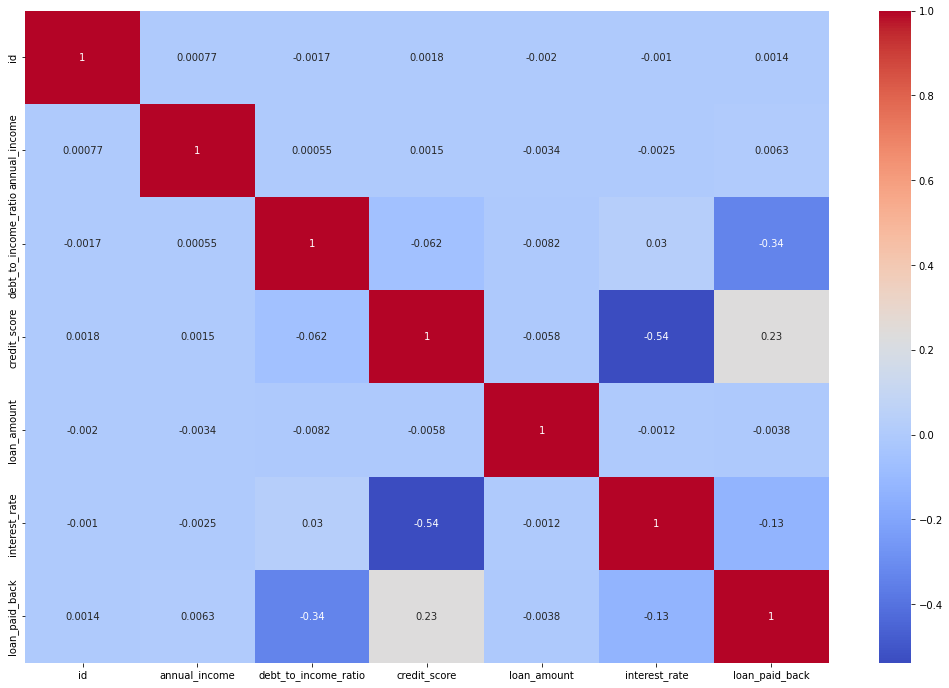

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(train_data.corr(), annot=True,cmap="coolwarm")

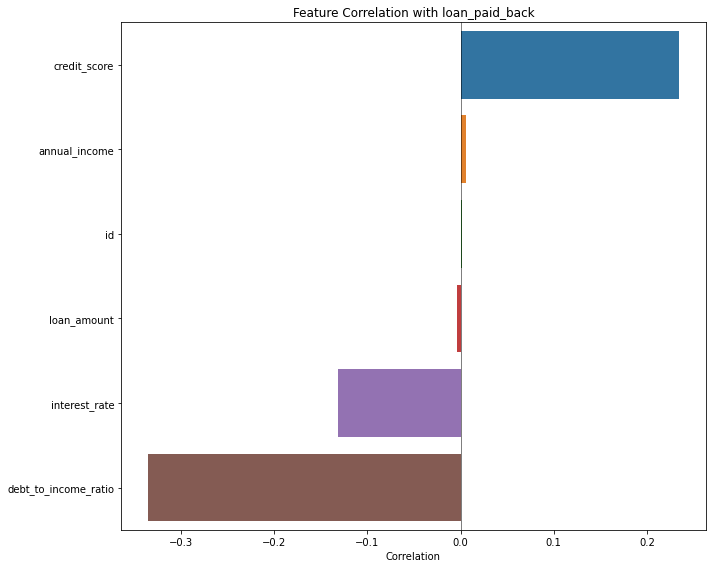

In [12]:
correlations = train_data.corr()['loan_paid_back'].drop('loan_paid_back').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with loan_paid_back') 
plt.xlabel('Correlation')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)  
plt.tight_layout()
plt.show()

# scaling data

In [13]:
# firstly we define number columns - 
num_cols = list(train_data.select_dtypes(include=[np.number]).columns.difference(['loan_paid_back']))
num_cols_test_data = list(test_data.select_dtypes(include=[np.number]).columns.difference(['loan_paid_back']))

# then we define categorial columns in order to be able to use get_dummies()
cat_cols = list(train_data.select_dtypes(include=['object']).columns)
cat_cols_test_data = list(test_data.select_dtypes(include=['object']).columns)

# standartization of int/float data
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols_test_data] = scaler.transform(test_data[num_cols_test_data])

In [14]:
# scaling categorial columns
train_data = pd.get_dummies(train_data, columns=cat_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=cat_cols, drop_first=True)

In [15]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back,gender_Male,gender_Other,marital_status_Married,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,-1.732048,-0.705461,-0.535135,0.993849,-1.803484,0.653899,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.732042,-0.977248,0.660668,-0.810394,-1.505401,0.280571,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-1.732036,0.050689,-0.345556,0.236067,0.286558,-1.292385,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.732030,-0.050687,-0.812211,-2.668764,-1.492497,1.863482,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.732025,-0.850388,-0.987206,-0.287163,-0.409421,-1.068388,1.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Male,gender_Other,marital_status_Married,marital_status_Single,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,1.732054,-0.727434,-1.045538,-0.990818,-0.513804,1.181536,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.732060,-0.059367,-0.403888,0.921679,0.068137,0.245727,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.732065,0.252422,3.591842,-1.261455,-1.620421,0.464746,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.732071,-0.844850,-0.155978,-0.178909,-1.219370,-1.386961,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.732077,-0.862632,-0.578883,0.127812,0.386426,0.220838,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# seperate id from test data
test_data_id = test_data['id'].copy()

# we drop the unique features
train_data.drop('id', inplace=True, axis=1)
test_data.drop('id', inplace=True, axis=1)

# now we divide our data to x(features) and y(target)

In [18]:
X = train_data.drop('loan_paid_back', axis=1) # features
y = train_data['loan_paid_back'] # target

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (593994, 54)
y shape: (593994,)


# divide our train data to traing and validation data

In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, # 20% for validation
    random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (475195, 54)
X_val shape: (118799, 54)
y_train shape: (475195,)
y_val shape: (118799,)


# training and selecting best parameters for model

In [93]:
# writing some parameters
param_grid_1 = {
    'n_estimators': [20, 50, 150, 500],
    'max_depth': [10, 50, 100],
    'learning_rate': [0.1, 0.5]
}

grid_search_xbg_1 = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid_1,
    cv=5, 
    scoring='accuracy',
    verbose=1,
    n_jobs=-1   
)

# training model
grid_search_xbg_1.fit(X_train, y_train)

print(f"best parameters: {grid_search_xbg_1.best_params_}")
print(f"accuracy: {grid_search_xbg_1.best_score_}")  

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
accuracy: 0.9037342564631363


In [94]:
# writing more detailed parameters which are close to best parameters from previous test
param_grid_2 = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.1, 0.2]
}

grid_search_xbg_2 = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid_2,
    cv=5, 
    scoring='accuracy',
    verbose=1,
    n_jobs=-1   
)

# training model
grid_search_xbg_2.fit(X_train, y_train)

print(f"best parameters: {grid_search_xbg_2.best_params_}")
print(f"accuracy: {grid_search_xbg_2.best_score_}")  

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
accuracy: 0.9047738296909689


In [96]:
# writing more detailed parameters which are close to best parameters from previous test
param_grid_3 = {
    'n_estimators': [200, 250, 300],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.2, 0.3]
}

grid_search_xbg_3 = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid_3,
    cv=5, 
    scoring='accuracy',
    verbose=1,
    n_jobs=-1   
)

# training model
grid_search_xbg_3.fit(X_train, y_train)

print(f"best parameters: {grid_search_xbg_3.best_params_}")
print(f"accuracy: {grid_search_xbg_3.best_score_}")  

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}
accuracy: 0.9049295552352191


In [23]:
# creating model with best parameters
model_1 = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    random_state=42,
    eval_metric='logloss'
)

# trainig model 
model_1.fit(X_train, y_train)

train_accuracy_model_1 = model_1.score(X_train, y_train)
print(f"model_1 accuracy on train data: {train_accuracy_model_1:.4f}")

val_accuracy_model_1 = model_1.score(X_val, y_val)
print(f"model_1 accuracy on validation data: {val_accuracy_model_1:.4f}")



# checking model for other metrics 

# precision 
y_pred = model_1.predict(X_val)


precision = precision_score(y_val, y_pred)
print(f"model_1 precision: {precision:.4f}")


# recall 
recall = recall_score(y_val, y_pred)
print(f"model_1 recall: {recall:.4f}")


# f1 score
f1 = f1_score(y_val, y_pred)
print(f"model_1 f1 score: {f1:.4f}")

# gettin probability 
y_pred_proba = model_1.predict_proba(X_val)[:, 1] # because predict_proba gives us a massive like [:, 0] but wee need massive wiht one element for roc_auc_score

# roc_auc_score 
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"roc_auc_score: {roc_auc}")

model_1 accuracy on train data: 0.9067
model_1 accuracy on validation data: 0.9052
model_1 precision: 0.9083
model_1 recall: 0.9802
model_1 f1 score: 0.9429
roc_auc_score: 0.9222725082430484


In [24]:
test_ids = pd.read_csv("/data/notebook_files/test.csv")['id'].copy()

# making the same features as in train data
test_aligned = test_data.reindex(columns=X_train.columns, fill_value=0)

y_pred = model_1.predict_proba(test_aligned)[:, 1]  # если нужны вероятности: model_1.predict_proba(test_aligned)[:, 1]

final_submission = pd.DataFrame({
    'id': test_ids.values,
    'loan_paid_back': y_pred
})
final_submission.to_csv("submission.csv", index=False)

In [25]:
final_submission

,id,loan_paid_back
0,593994,0.929436
1,593995,0.981300
2,593996,0.496305
3,593997,0.921135
4,593998,0.960522
...,...,...
254564,848558,0.993204
254565,848559,0.832742
254566,848560,0.970774
254567,848561,0.982502
